## Support Vector Machines: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Support Vector Machines model.

### Read in Data

![CV](../../img/CV.png)
![Cross-Val](../../img/Cross-Val.png)

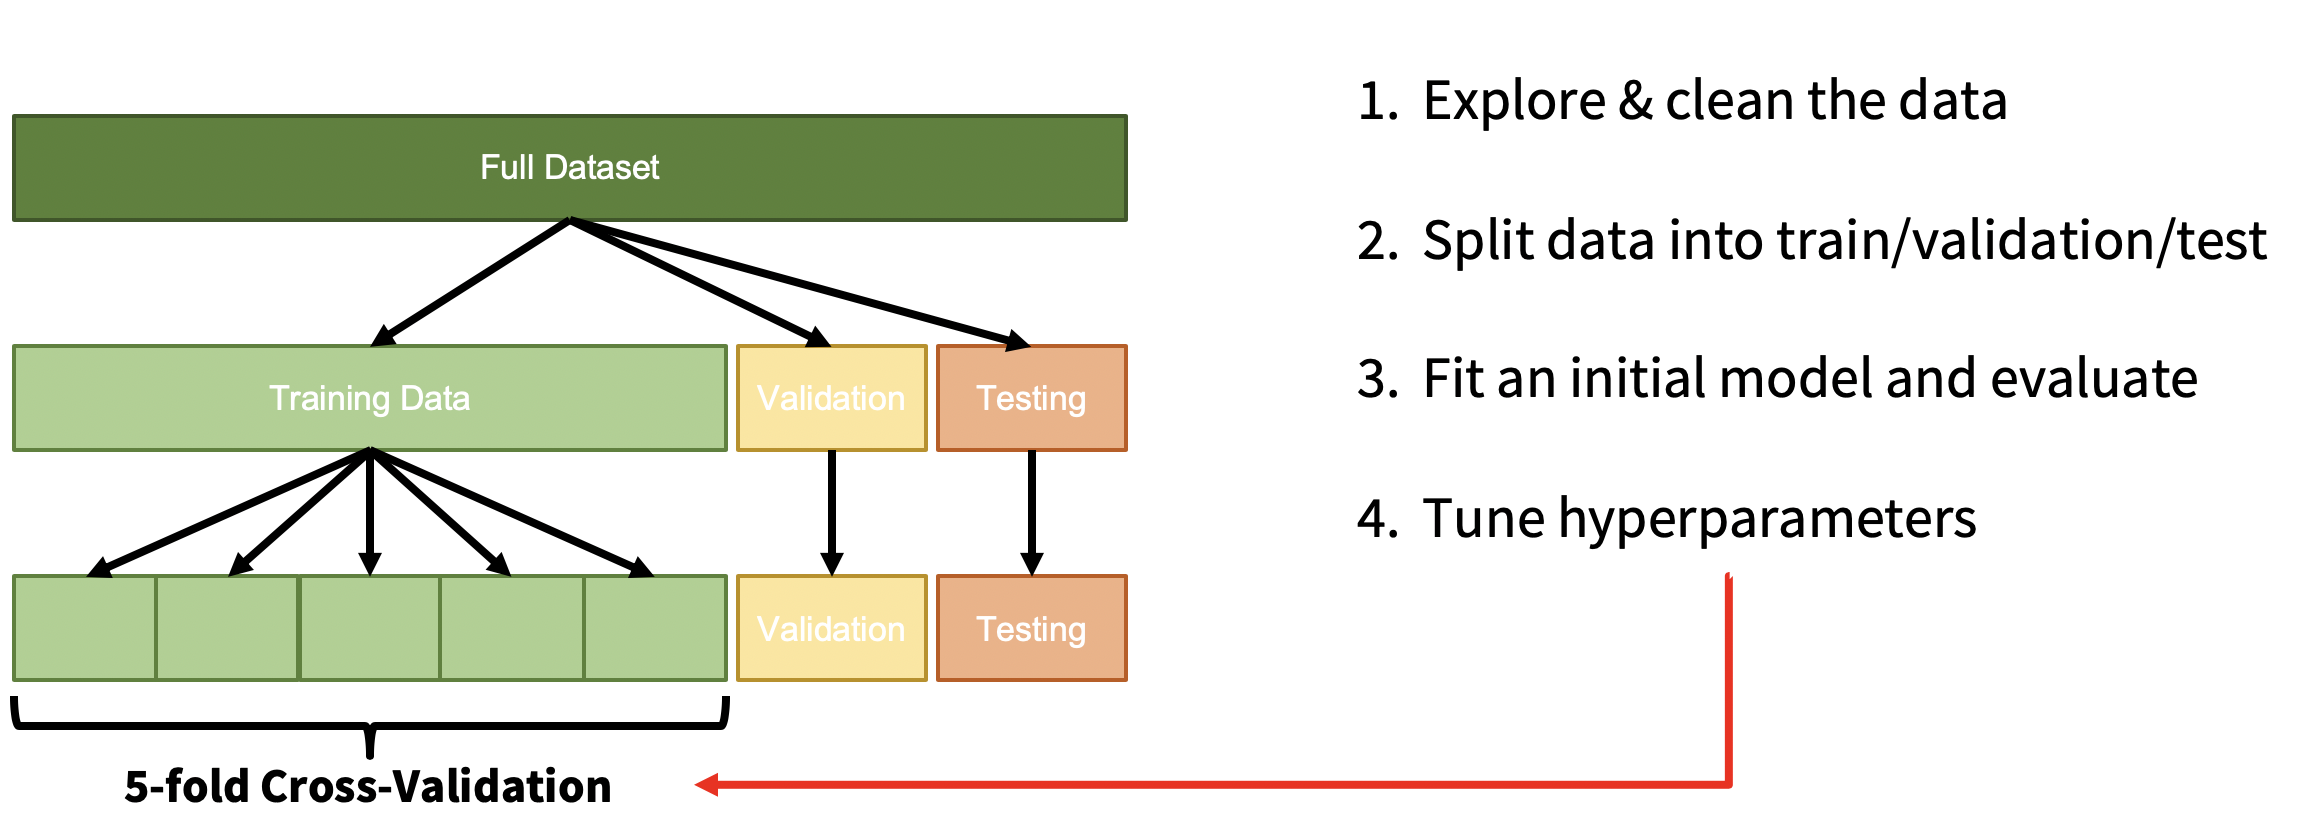

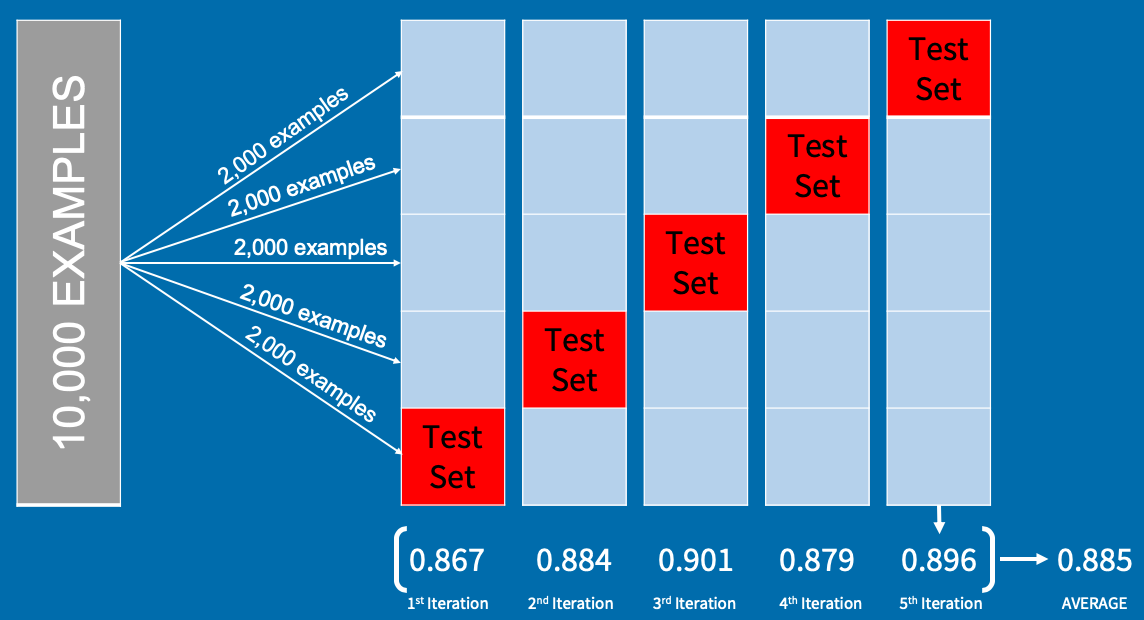

In [13]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv', header=None)

In [14]:
tr_features # X features

,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,2,0,62.000000,10.5000,0,0
1,3,0,8.000000,29.1250,5,0
2,3,0,32.000000,56.4958,0,0
3,3,1,20.000000,9.8250,1,0
4,2,1,28.000000,13.0000,0,0
...,...,...,...,...,...,...
529,3,1,21.000000,7.6500,0,0
530,1,0,29.699118,31.0000,0,0
531,3,0,41.000000,14.1083,2,0
532,1,1,14.000000,120.0000,3,1


In [15]:
tr_labels #y target

,0
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


### Hyperparameter tuning

![c](../../img/c.png)

In [16]:
from sklearn.svm import SVC

In [6]:
SVC()

SVC()

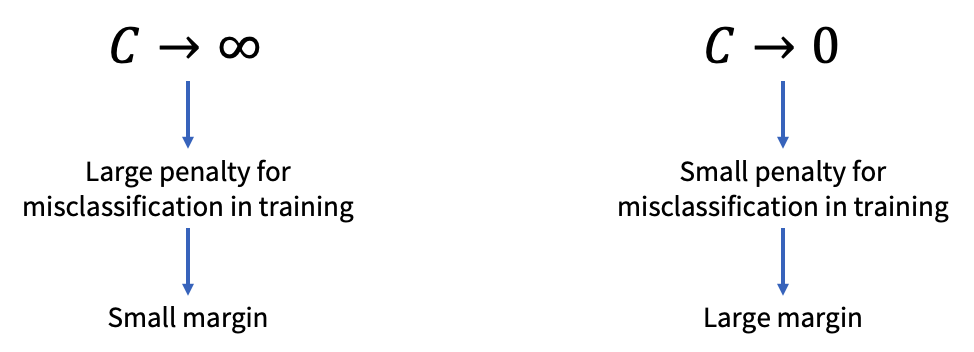

In [10]:
cv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [11]:
cv.cv_results_

{'mean_fit_time': array([6.06798649e-02, 6.76560402e-03, 3.34168425e+00, 7.17587471e-03,
        8.83978877e+00, 7.37104416e-03]),
 'std_fit_time': array([3.41147336e-02, 4.05258091e-04, 2.71568314e+00, 4.03204755e-04,
        3.97400111e+00, 4.77576317e-04]),
 'mean_score_time': array([0.00179543, 0.00341339, 0.0015902 , 0.00320182, 0.00140014,
        0.00359416]),
 'std_score_time': array([0.00039932, 0.00049343, 0.00048469, 0.00039223, 0.00048178,
        0.00049158]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'kernel': 'linear'},
  {'C': 0.1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 

In [17]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [18]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [19]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

### Write out pickled model

In [6]:
joblib.dump(cv.best_estimator_, '../../../SVM_model.pkl')

['../../../SVM_model.pkl']